<a href="https://colab.research.google.com/github/SettibathulaJyothi/Machine-Learning-and-Deep-Learning-Projects/blob/main/Designing_a_Neural_Network_for_Classifying_Newswires_(Multi_Class_Classification)_Using_the_Reuters_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# Load the Reuters dataset
from tensorflow.keras.datasets import reuters
# Load dataset with the top 10,000 words
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)


2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Display dataset statistics
print(f"Training samples: {len(x_train)}")
print(f"Testing samples: {len(x_test)}")
print(f"Number of classes: {max(y_train) + 1}")

Training samples: 8982
Testing samples: 2246
Number of classes: 46


In [5]:
# Convert sequences into uniform length using padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
# Define parameters
max_length = 200 # Maximum sequence length
# Padding sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=46)
y_test = to_categorical(y_test, num_classes=46)

In [6]:
# Build the neural network model
model = keras.models.Sequential([
 keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=max_length),
 keras.layers.Conv1D(64, 5, activation='relu'),
 keras.layers.MaxPooling1D(pool_size=2),
 keras.layers.LSTM(64, return_sequences=True),
 keras.layers.LSTM(64),
 keras.layers.Dense(64, activation='relu'),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(46, activation='softmax') # Output layer for multi-class classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [7]:
# Compile the model
model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 35s 264ms/step - accuracy: 0.2999 - loss: 2.9880 - val_accuracy: 0.5331 - val_loss: 1.9023
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 28s 250ms/step - accuracy: 0.5184 - loss: 1.8633 - val_accuracy: 0.5537 - val_loss: 1.7127
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 28s 251ms/step - accuracy: 0.5449 - loss: 1.7488 - val_accuracy: 0.5838 - val_loss: 1.6086
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 29s 258ms/step - accuracy: 0.5969 - loss: 1.5789 - val_accuracy: 0.6144 - val_loss: 1.5221
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 258ms/step - accuracy: 0.6209 - loss: 1.4507 - val_accuracy: 0.6233 - val_loss: 1.4809
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 256ms/step - accuracy: 0.6652 - loss: 1.2842 - val_accuracy: 0.6566 - val_loss: 1.4032
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 29s 254ms/step - accuracy: 0.7023 - loss: 1.1631 - val_accuracy: 0.6583 - val_loss: 1.4675
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 29s 259ms/step - accuracy: 0.7132 - loss: 1

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6647 - loss: 1.4157
Test Accuracy: 0.6478


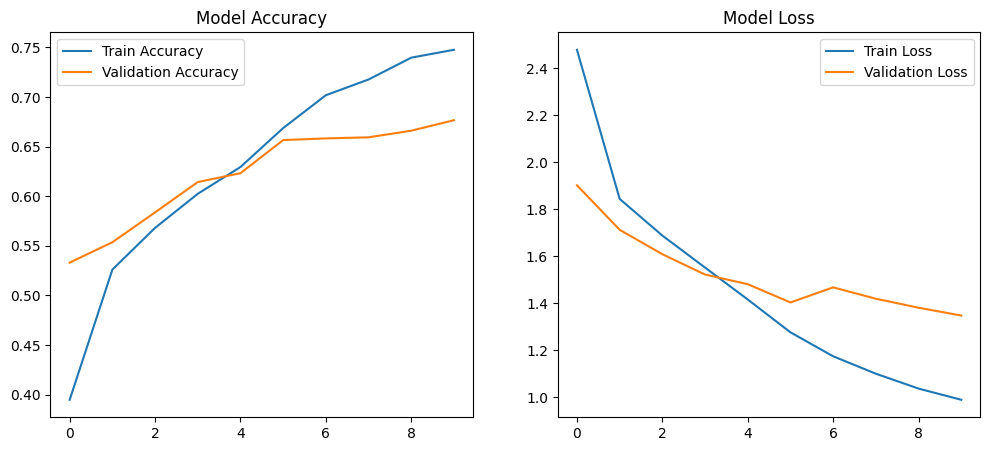

In [10]:

# Plot accuracy and loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()